#### AI 헬스케어 첫번째 미니 프로젝트 “흡연 여부 데이터 분석을 통한 건강 인사이트 도출” 에 오신 여러분 환영합니다.
이번 프로젝트에서는 흡연여부를 판단하는 데이터를 가지고 시각화 및 가설을 판별해보려고 합니다.


A-Z로 진행되는 만큼 천천히 따라해보세요!

#### 팀 과제
- 데이터 구조, 분포 확인, 전처리 : 1.1_흡연여부데이터
- 데이터 간 관계 가설 수립 및 검증 : 1.2_데이터분석



### 흡연여부데이터 분석하기
최근 여러 기관에서는 흡연이 개인의 건강에 미치는 영향을 정확히 파악하고,
이를 기반으로 예방 중심의 건강관리 정책을 수립하려는 노력을 강화하고 있습니다.

하지만 “흡연 여부”를 직접 조사하는 것은 현실적으로 쉽지 않습니다.
이에 따라, 건강검진 데이터를 통해 흡연 여부를 데이터 기반으로 추정하고,
흡연자와 비흡연자 간의 생체·건강 지표 차이를 검증하려는 프로젝트가 시작되었습니다.

여러분은 이 프로젝트의 데이터 분석가이자 AI 엔지니어로 참여하게 되었습니다.
주어진 데이터에는 개인의 건강검진 결과(혈압, 혈당, 콜레스테롤, BMI 등)와
흡연 여부(label = 0 또는 1)가 포함되어 있습니다.

이제 여러분의 역할은 흡연 여부 데이터의 특성을 분석하고 시각화하며,
통계적 검정을 통해 변수 간 관계를 규명하는 것입니다.
시작해봅시다 !

#### 🎯 프로젝트 목표

	•	흡연자와 비흡연자 간의 건강 지표 차이 분석
	•	주요 변수들의 분포, 상관관계, 통계적 유의성 검증
	•	시각화를 통한 데이터 인사이트 도출
	•	추후 흡연 여부 예측 모델 개발을 위한 기초 분석 기반 마련




---



### 1. 가설 수립 (인당 최소 3개)

건강 지표별로 흡연자/비흡연자 간 통계적 차이 검증

(예시)
- H₀ (귀무가설): BMI- 흡연자와 비흡연자의 평균 BMI는 같다.
- H₁ (대립가설): BMI- 흡연자와 비흡연자의 평균 BMI는 다르다.

In [ ]:
### 아래에 3가지의 가설을 설정해보세요.
# 가설 1.
#흡연은 구강질환(충치)을 증가시키고,이 구강질환은 신체기능 약화와 연관된다

# 가설 2.
#흡연율이 대사질환(혈당, 콜레스테롤)에 미치는 영향 나이대 어릴수록 영향이 적을것이다
#(활동량차이,신체노화..대사기능저하 혈관탄력감소,흡연 누적으로 인한 만성 염증 증가)

# 가설 3.
#흡연 여부에 따라 공복 혈당, 요 단백, 크레아티닌과 같은 대사 및 신장 기능 관련 지표에 차이가 존재하는가

나이대별 흡연율이 혈압에 미치는 영향 어릸수록 영향이 적을것이다
(활동량차이,신체노화..대사기능저하 혈관탄력감소,흡연 누적으로 인한 만성 염증 증가)
20–30대: 흡연 여부에 따른 수축기 혈압 평균 차이 거의 없음 예상
40–60대: 차이가 커짐 (흡연자가 더 높음)
70대 이상: 기저질환 영향이 더 커져서 흡연 영향 약간 약해질 수 있음(뒤섞임)
흡연률이 나이대에 상관없이 대사질환에 영향을 끼칠것이다. bmi


## 2. 단변량 분석

	단변량 분석 의미
  단변량 분석에는 단일 변수의 조사가 포함됩니다 데이터 분석의 가장 간단한 형태이며 개별 변수의 특성을 설명하는 데 자주 사용됩니다.

  목적: 단변량 분석은 주로 단일 변수의 분포를 요약 및 시각화하고 중심 경향을 평가하는 데 사용됩니다
  
  (평균, 중앙값, 모드)분산 (범위, 분산, 표준 편차)및 모양 (예: 히스토그램, 상자 그림).
  
  단일 변수의 특성을 단독으로 이해하는 데 도움이 됩니다.
  

    •	데이터 품질(결측, 이상치) 확인

    •	모델 입력값 기준 설정

- 숫자형, 범주형
- 전처리 사항
  - NaN 존재 여부 및 조치 방안
  - 가변수화 대상여부
- 기초통계량 확인
- 분포 확인
- 위 정보로부터 파악한 비즈니스 내용 정리
- 추가 분석해볼 사항 도출

단변량분석 단계에서는 변수의 분포를 이해하는 것
가변수화는 0/1 같은 숫자로 바꿔야 하느냐, 말아도 되느냐 인데 안해도되는거 아닌가

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# 데이터 로드
df = pd.read_csv("health_data_clean.csv")
print(df.head())

df.info()

#============그래프 설정===========

#범례 전용 함수 넣기 복붙 귀찮
smoking_palette ={ 0:'#F2E9DC',#비흡연자
                  1:'#506D61' #흡연자
                  }
def set_smoking_legend(ax):
    ax.legend(
        title='흡연 여부',
        labels=['비흡연자', '흡연자'],
        loc='upper left',
        bbox_to_anchor=(1, 1)
    )
# 색상 팔레트
sns.set_palette("BuGn")

#
df['label'] = df['label'].astype(int)
df['충치'] = df['충치'].astype(int)
#=====================================

# 흡연 라벨
df["흡연여부"] = df["label"].map({0:"비흡연", 1:"흡연"})

# 나이대 순서 고정
age_label = ["30대 이하", "30~50대", "50~70대", "70대 이상"]
df["연령대"] = pd.Categorical(df["연령대"], categories=age_label, ordered=True)

# 분석 대상 결측 제거
df = df.dropna(subset=["연령대", "흡연여부", "혈압"])

           ID  나이  키(cm)  몸무게(kg)    BMI    시력  충치  공복 혈당    혈압  중성 지방  \
0  TRAIN_0000  35    170       70  24.22  1.10   1   98.0  40.0   80.0   
1  TRAIN_0001  40    150       55  24.44  1.00   0  173.0  39.0  104.0   
2  TRAIN_0002  60    170       50  17.30  0.75   0   96.0  40.0   61.0   
3  TRAIN_0003  40    150       45  20.00  0.50   0   92.0  40.0   46.0   
4  TRAIN_0004  55    155       65  27.06  1.00   0   87.0  42.0   95.0   

   혈청 크레아티닌  콜레스테롤  고밀도지단백  저밀도지단백  헤모글로빈  요 단백  간 효소율  label     연령대 체중상태구분  
0       1.3    211      75     120   15.9     1   1.53      1  30~50대     정상  
1       0.6    251      46     184   11.8     1   1.45      0  30~50대     정상  
2       0.8    144      43      89   15.3     1   1.04      0  50~70대    저체중  
3       0.7    178      66     110   13.4     1   1.18      0  30~50대     정상  
4       0.9    232      62     151   13.8     1   1.32      0  50~70대    과체중  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data co

In [ ]:
!apt-get -qq update
!apt-get -qq install -y fonts-noto-cjk
!rm -rf ~/.cache/matplotlib

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

#폰트 매니저에 폰트 추가
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc', # 경로
    name='NotoSansCJK')                        # 내가 부여할 이름
fm.fontManager.ttflist.insert(0, fe)            # 폰트 목록 맨 앞에 삽입
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.dpi"] = 140
plt.rcParams["font.size"] = 11

#전역 폰트 설정 (이제 fontproperties를 일일이 안 써도 됩니다!)
plt.rcParams['font.family'] = 'NotoSansCJK'
plt.rcParams['axes.unicode_minus'] = False        # 마이너스 깨짐 방지

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


##1)이진범주형 빈도 비율 countplot
####1-1)흡연여부-label ,충치여부
####1-2)요 단백 빈도 비율

##2)연속형 histplot, kde, boxplot, kdeplot써봐야지
####2-1)BMI

####2-2)공복 혈당
####2-3)저밀도지단백
####2-4)혈압 -> 값 이상하지만 분포만 확인해보기

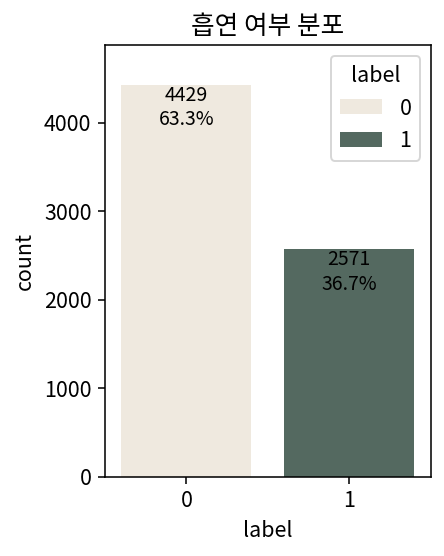

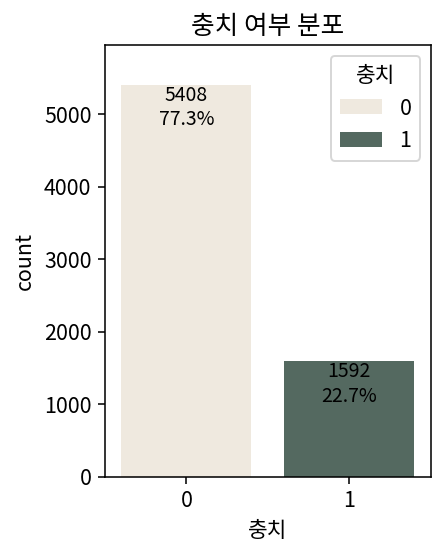

/tmp/ipython-input-4183379781.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


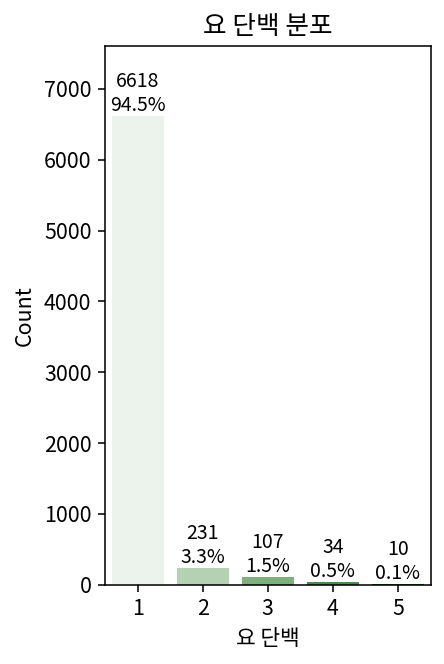

In [ ]:
#1)이진범주형 빈도 비율 countplot 함수로 생성
def count_plot(data, col, palette, title,figsize=(3, 4),order=None, legend_fn=None):
    total = len(data)
    max_count = data[col].value_counts().max()

    plt.figure(figsize=figsize)
    ax = sns.countplot(x=col,
                      data=data,
                      hue=col,
                      order=order,
                      palette =palette,
                      ) #----------------가본형태가져올거지정

    for container in ax.containers: #----안에내용물 상세설정 개수랑 비율 막대위에 넣기
      for bar in container:
        count = int(bar.get_height())
        pct = count / total * 100
        ax.text(                        #----------그래프 안 텍스트 설정(숫자)
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{count}\n{pct:.1f}%',
            ha='center',
            va='top',
            fontsize=10
            )
    if legend_fn is not None:    #--------충치에도 흡연 범주 나오는거 수정
        legend_fn(ax)
    ax.set_ylim(0, max_count * 1.1)  #---------- 여유 주기
    if title:
          ax.set_title(title)
    plt.show()

#1-1)흡연여부-label,충치여부
count_plot(data=df,
           col='label',
           palette=smoking_palette,
           order=sorted(df['label'].dropna().unique()),
           title='흡연 여부 분포'
           )

count_plot(data=df,
           col='충치',
           palette=smoking_palette,
           order=sorted(df['충치'].dropna().unique()),
           title='충치 여부 분포'
           )
#1-2)요 단백 빈도 비율
plt.figure(figsize=(3, 5))
ax = sns.countplot(
                    data=df,
                    x='요 단백',
                    palette='light:g', #팔레트 색조합 예뿌당
    )
total = len(df['요 단백'])
max_count = df['요 단백'].value_counts().max() #그래프 뚫고 나가는 수치결과 처리용
for container in ax.containers:
  for bar in container:
    count = int(bar.get_height())
    pct = count / total * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{count}\n{pct:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )
ax.set_title('요 단백 분포')
ax.set_ylabel('Count')
ax.set_ylim(0, max_count * 1.15)  # 15% 여유 주기
plt.show()


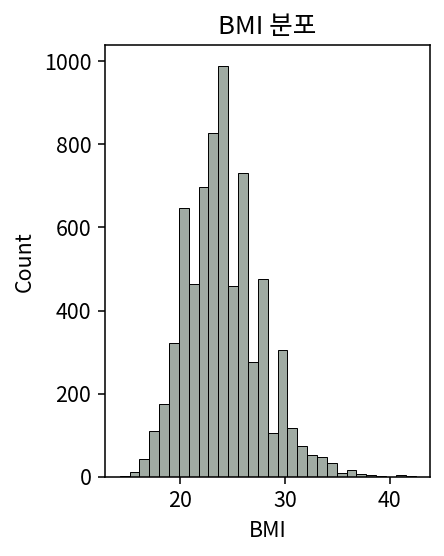

/tmp/ipython-input-3484259309.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipython-input-3484259309.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


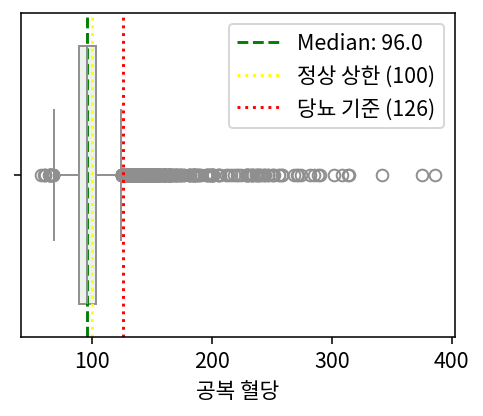

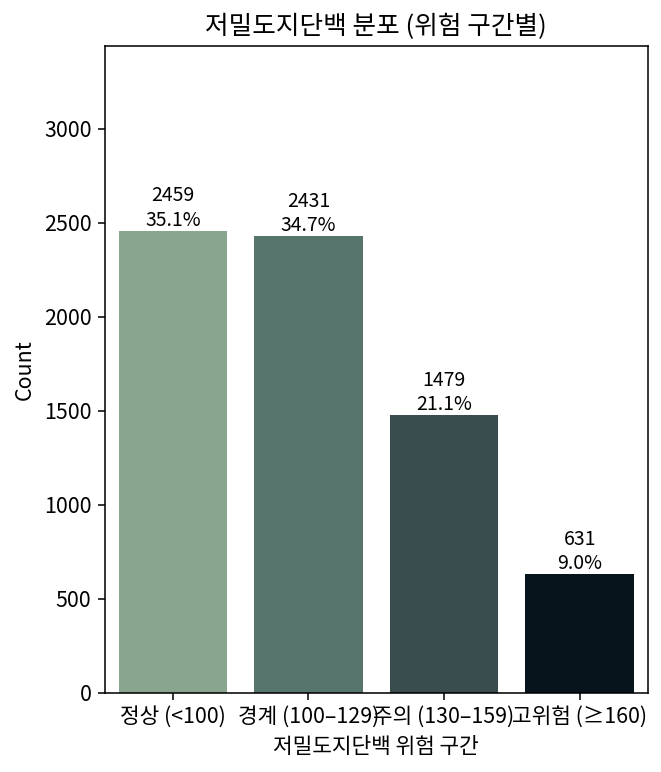

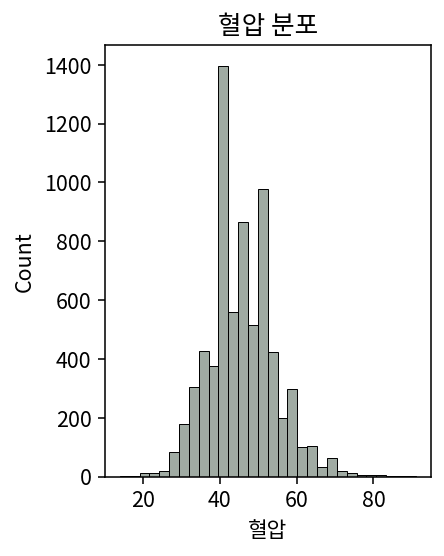

In [ ]:
#2)연속형 histplot, kde, boxplot, kdeplot써봐야지
#함수로 hisplot
def his_plot(data,col,title=None,figsize=(3,4), bins=30):
    plt.figure(figsize=figsize)
    ax = sns.histplot(
                      x = col,
                      data = data,
                      bins = bins,
                      color = '#808f85'
    )
    if title:
        ax.set_title(title)
    else:
        ax.set_title(f'{col} 분포')
        plt.show()

#2-1 BMI
his_plot(df,'BMI')

#2-2)공복 혈당
#중앙값을 더 잘보이게 써줘야지
median = df['공복 혈당'].median()

plt.figure(figsize=(4,3))
ax = sns.boxplot(
                data=df,
                x='공복 혈당',
                palette='light:g'
)

ax.axvline(median, color='green', linestyle='--', label=f'Median: {median:.1f}')
ax.axvline(100, color='yellow', linestyle=':', label='정상 상한 (100)')
ax.axvline(126, color='red', linestyle=':', label='당뇨 기준 (126)')

ax.legend()

palette = {
    '정상 (<100)': '#84a98c',
    '경계 (100–129)': '#52796f',
    '주의 (130–159)': '#354f52',
    '고위험 (≥160)': '#04151f'
}

#2-3)저밀도지단백
plt.figure(figsize=(5,6))
bins = [0, 100, 130, 160, df['저밀도지단백'].max()]
labels = ['정상 (<100)', '경계 (100–129)', '주의 (130–159)', '고위험 (≥160)']

df['LDL_위험구간'] = pd.cut(          #----위험구간 컬럼만들기(연속형값이라 생각처럼 안나와서..)
    df['저밀도지단백'],
    bins=bins,
    labels=labels,
    include_lowest=True
)                                   #----이제 구간별로! 범주형 됨
ax = sns.countplot(
    data=df,
    x='LDL_위험구간',
    order=labels,
    palette=palette
)
ldl_total = df['LDL_위험구간'].dropna().shape[0]  #--------x축
ldl_counts = df['LDL_위험구간'].value_counts().max() #-----y축
for container in ax.containers: #----상세설정 묶음 (모든 막대기에)
  for bar in container:
        count = int(bar.get_height())
        pct = count / ldl_total * 100
        ax.text(                        #----------그래프 안 텍스트 설정(숫자)
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{count}\n{pct:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10,
                        )
ax.set_ylim(0, ldl_counts * 1.4)  #---------- 여유 주기
ax.set_title('저밀도지단백 분포 (위험 구간별)')
ax.set_xlabel('저밀도지단백 위험 구간')
ax.set_ylabel('Count')

plt.show()


#2-4)혈압 -> 값 이상하지만 분포만 확인해보기
his_plot(df,'혈압')

## 3.이변량 분석
	이변량 분석 의미 찾기: 두 변수를 동시에 분석하여 두 변수 사이에 관계나 연관성이 있는지 확인하는 작업이 .

  목적: 이변량 분석은 두 변수 간의 관계, 상관관계 또는 연관성을 이해하는 데 사용됩니다. 이변량 분석을 위한 일반적인 기술에는 산점도, 상관 계수가 포함됩니다. (예를 들어, 피어슨의 상관관계)및 분할표 (범주형 변수의 경우). "사람의 나이와 소득 사이에 관계가 있습니까?"

    •	변수 간 원인–결과 관계 탐색

    •	어떤 요인이 가장 큰 영향을 주는지 도출

    •	향후 예측 모델 설계 시 주요 Feature 후보 선별

- 가설검정시 다음의 항목을 참조하여 수행합니다.
  - 유의수준 : 5%
  - 숫자 --> 숫자 : 상관분석
  - 범주 --> 범주 : 카이제곱검정
  - 범주 --> 숫자 : t검정, 분산분석
  - 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

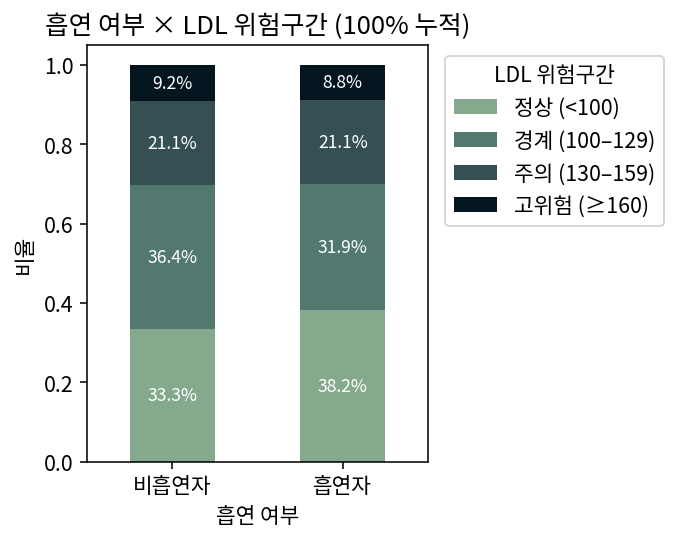


[Chi-square Analysis Result Report]
------------------------------------------------------------
Chi-square statistic : 20.87
P-value              : 0.0001
Degrees of freedom   : 3
------------------------------------------------------------
Conclusion:
→ 흡연 여부와 LDL 위험구간은 통계적으로 유의한 관련이 있다 (p < 0.05)
------------------------------------------------------------
Observed Values
LDL_위험구간  정상 (<100)  경계 (100–129)  주의 (130–159)  고위험 (≥160)
label                                                      
0              1476          1611           936         406
1               983           820           543         225
------------------------------------------------------------
Expected Values
LDL_위험구간    정상 (<100)  경계 (100–129)  주의 (130–159)  고위험 (≥160)
label                                                        
0         1555.844429   1538.128429    935.784429  399.242714
1          903.155571    892.871571    543.215571  231.757286


In [ ]:
# 흡연 여부 × LDL 위험구간 : ㅋㅏ이제곱검정
# LDL 위험구간 라벨(4개) — pd.cut 만들 때와 동일하게!
ldl_labels = ['정상 (<100)', '경계 (100–129)', '주의 (130–159)', '고위험 (≥160)']
# 흡연 여부(행) 기준으로 LDL 구간 비율(열) 만들기
ct = pd.crosstab(df['label'], df['LDL_위험구간'], normalize='index')  #행
ct = ct.reindex(columns=ldl_labels) # 열 순서 고정

ax = ct.plot(
              kind = 'bar',  #----누적그래프로~!
             stacked=True,
             figsize=(5, 4),
             color=[palette[k] for k in ldl_labels]
             )
#Matplotlib의 patches를 이용하여 각 막대(Segment)의 중앙에 수치를 추가.
for container in ax.containers:
      heights = [bar.get_height() for bar in container]
      ldl_labels = [f'{h*100:.1f}%' if h > 0 else '' for h in heights]
      ax.bar_label(
                    container,
                   labels=ldl_labels,
                   label_type='center',
                   fontsize=9,
                   color='white',
                   fontweight='bold')

ax.set_ylabel('비율')
ax.set_xlabel('흡연 여부')
ax.set_xticklabels(['비흡연자', '흡연자'], rotation=0)
ax.set_title('흡연 여부 × LDL 위험구간 (100% 누적)')
ax.legend(title='LDL 위험구간', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

#-----------------------======================================검정

#범주형 교차.. 카이제곱검정 원인(독립변수):흡연, 결과(종속변수):LDL
#p-value 기준 p < 0.05 : 흡연 여부와 LDL 위험구간은 관련이 있다
from scipy.stats import chi2_contingency
import numpy as np

smoke_ldl_table = pd.crosstab(df['label'], df['LDL_위험구간'])

chi2, p_val, dof, expected = chi2_contingency(smoke_ldl_table)


print('\n[Chi-square Analysis Result Report]')
print('-'*60)
print(f'Chi-square statistic : {chi2:.2f}')
print(f'P-value              : {p_val:.4f}')
print(f'Degrees of freedom   : {dof}')
print('-'*60)
if p_val < 0.05:
    print('Conclusion:')
    print('→ 흡연 여부와 LDL 위험구간은 통계적으로 유의한 관련이 있다 (p < 0.05)')
else:
    print('Conclusion:')
    print('→ 흡연 여부와 LDL 위험구간은 통계적으로 유의한 관련이 없다 (p ≥ 0.05)')
print('-'*60)
print('Observed Values')
print(smoke_ldl_table)
print('-'*60)
print('Expected Values')
print(pd.DataFrame(expected,
                   index=smoke_ldl_table.index,
                   columns=smoke_ldl_table.columns))
print('='*60)


###흡연 여부에 따른 저밀도지단백(LDL) 위험구간의 분포를 100% 누적 막대그래프로 비교한 결과
 고위험 비율 합
 비흡연자: (주의 36.4% + 고위험 9.2% = 66.7%)

 흡연자:(주의 31.9% + 고위험 8.8% = 61.8%)

 흡연자집단보다 비흡연자 집단에서 오히려 ‘주의~고위험’ 비율이 더 높다
 그런데 카이제곱 검정에서 p값은 통계적으로 유의함이 나왔다 이해가 좀 안가서 찾아보니
 카이제곱검정은 **전체 분포 구조가 독립인지 아닌**지를 본다.
 즉 봐야할것은 **4개 구간의 ‘조합 전체’가 흡연 여부에 따라 다르냐**를 보는 것이다.


<table border="1">
  <!-- 1행 -->
  <tr>
    <td>구간
</td>
    <td>비흡연
</td>
    <td>흡연
</td>
  </tr>
  <!-- 2행 -->
  <tr>
    <td>정상
</td>
    <td>33.3%
</td>
    <td>38.2% ↑
</td>
  </tr>
  <!-- 3행 -->
  <tr>
    <td>경계
</td>
    <td>36.4% ↑
</td>
    <td>31.9% ↓
</td>
  </tr>
  <!-- 4행 -->
  <tr>
    <td>주의
</td>
    <td>21.1%
</td>
    <td>21.1% (동일)
</td>
  </tr>
  <!-- 5행 -->
  <tr>
    <td>고위험
</td>
    <td>9.2%
</td>
    <td>8.8%
</td>
  </tr>
</table>

차이는 ‘주의·고위험이 많다’가 아니라 정상 ↔ 경계 구간의 비율 이동에서 발생한다.
흡연자 집단에서 LDL 고위험 비율이 더 높다고 보기는 어려웠으나,
이처럼 정상과 경계 구간에서의 비율 차이로 인해
LDL 위험구간의 전체 분포는 흡연 여부에 따라 유의하게 달랐다.
###카이제곱 검정 결과, 흡연 여부와 LDL 위험구간 간에는 통계적으로 유의한 관련성이 나타났다는 말의 의미가 바로 이 뜻이다.
(χ² = 20.87, p < 0.001).”

/tmp/ipython-input-1099626604.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


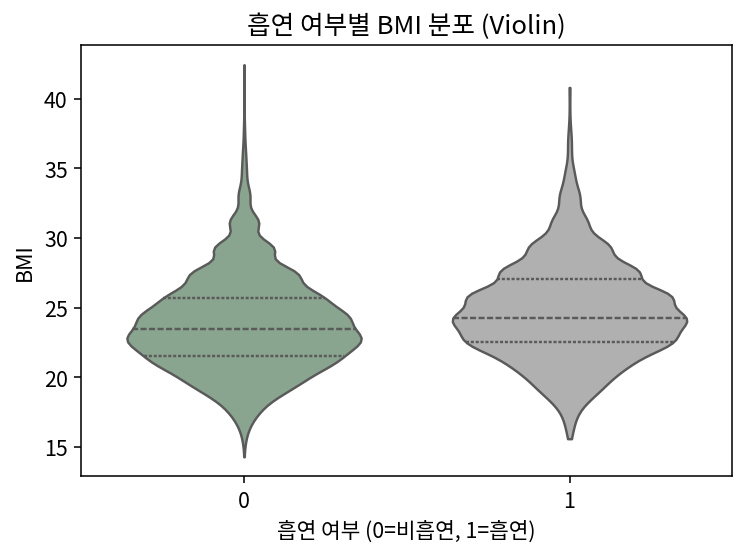

Welch t-test: t=-10.588, p=0.0000
Mann–Whitney U: U=4790810.000, p=0.0000


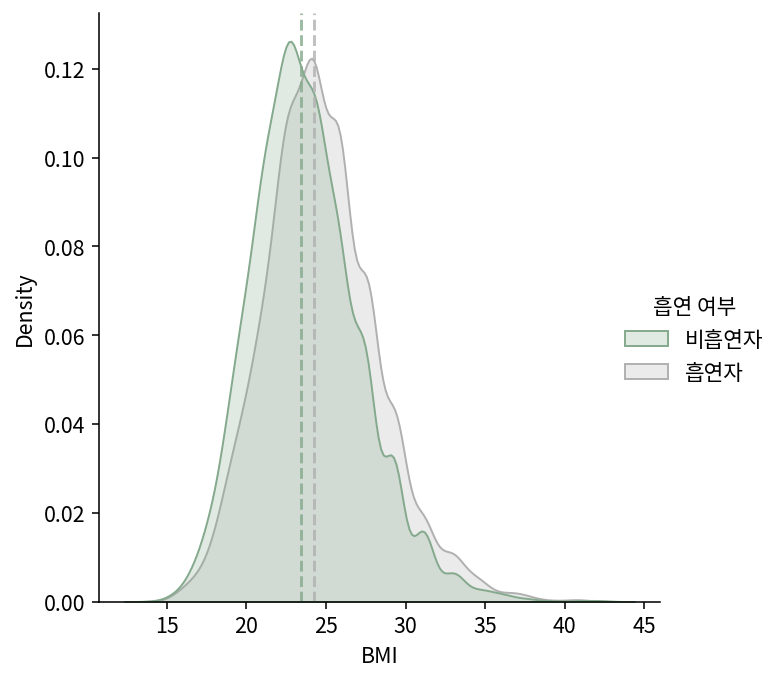

In [ ]:
# 흡연 여부 × BMI : violinplot , T-test검정, Mann-Whitney

#df['label'] = df['label'].astype(str).astype(int)      #--카테고리타입으로 해놨던거 다시 int로
#smoking_palette = {0: "#B0B0B0", 1: "#E74C3C"}

# label 타입 계속 에러 나서 그냥 컬럼 새로 팜 ㅡㅡ 아ㅏㅏㅏ짜ㅏㅏ자ㅡ응ㅇ아아ㅏㅏ어ㅣㅓ리ㅏ얼ㄴㅁㅇ로;마ㅣㅛㅕㅑㅓ
df['label_int'] = df['label'].astype(str).str.strip().astype(int)
plt.figure(figsize=(6,4))
ax = sns.violinplot(
                    data=df,
                    x="label",
                    y="BMI",
                    order=[0, 1],  # x축 순서 고정 (label이 int든 str이든 상관없이)
                    palette=["#84a98c", "#B0B0B0"],
                    gap=.1,
                    inner="quartile", #-------------IQR(중앙 50%) 범위(가운데 점선 → 중앙값)
                    cut=0                                           #(위 점선 → 상위 25% 경계
                )                                                   #아래 점선 → 하위 25% 경계
ax.set_title('흡연 여부별 BMI 분포 (Violin)')
ax.set_xlabel('흡연 여부 (0=비흡연, 1=흡연)')
plt.show()

g = sns.displot(data=df,
                    x="BMI",
                    hue="label",
                    palette={0: "#84a98c", 1: "#B0B0B0"},
                    kind="kde",
                    fill=True,
                    common_norm=False)
#중앙값 추세선 추가
median_0 = df.loc[df['label']==0, 'BMI'].median()
median_1 = df.loc[df['label']==1, 'BMI'].median()
# KDE가 그려진 Axes
ax = g.axes[0,0]
ax.axvline(median_0, color="#84a98c", linestyle="--", alpha=0.8) #---중앙값 세로선
ax.axvline(median_1, color="#B0B0B0", linestyle="--", alpha=0.8)
g._legend.set_title("흡연 여부")
for text, label in zip(g._legend.texts, ["비흡연자", "흡연자"]):
    text.set_text(label)

#-----------------------======================================검정(T-test / Mann–Whitney)
smoke0 = df.loc[df['label']==0, 'BMI'].dropna()
smoke1 = df.loc[df['label']==1, 'BMI'].dropna()   #-----그룹 분리

from scipy.stats import ttest_ind                  #-----T-test
t, p_t = ttest_ind(smoke0, smoke1, equal_var=False) # Welch t-test
print(f"Welch t-test: t={t:.3f}, p={p_t:.4f}")

from scipy.stats import mannwhitneyu              #----Mann–Whitney (비모수)
u, p_u = mannwhitneyu(smoke0, smoke1, alternative='two-sided')
print(f"Mann–Whitney U: U={u:.3f}, p={p_u:.4f}")

###흡연자와 비흡연자 모두 BMI 중앙값은 23–25 범위에 분포.
###흡연자 그룹에서 중앙값이 조금 더 높고, 상위 BMI 구간의 분포 폭이 더 넓게 나타남

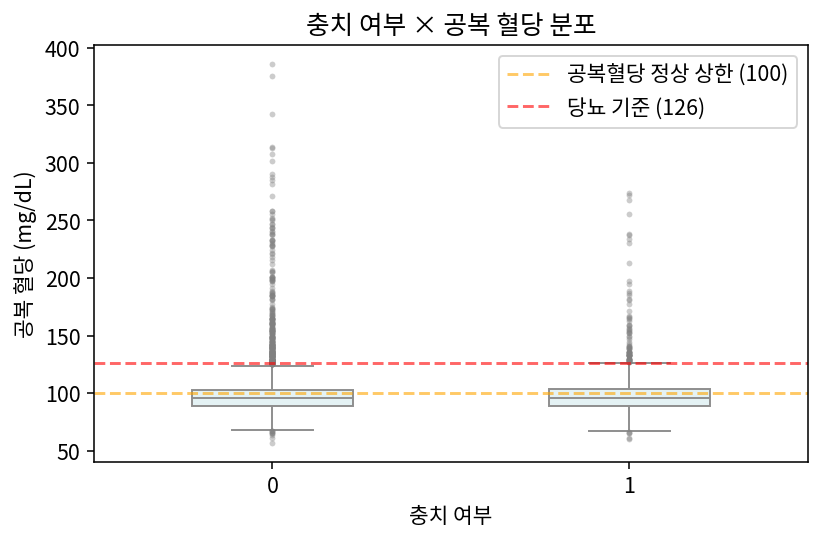

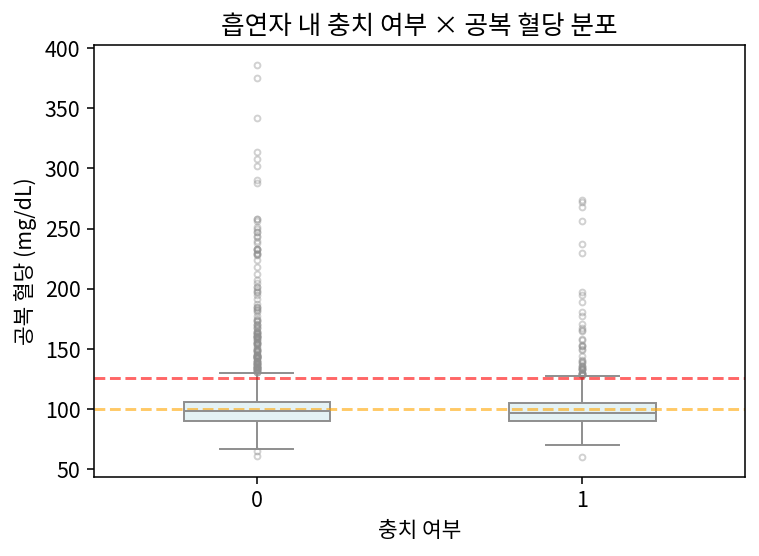

In [ ]:
#충치 여부 × 공복혈당 (보조) : boxplot + 기준선(100/126)
plt.figure(figsize=(6,4))
ax = sns.boxplot(
    data=df,
    x="충치",
    y="공복 혈당",
    showfliers=True, #------이상치 포함
    flierprops=dict(
        marker='o',
        markersize=3,
        markerfacecolor='gray',
        markeredgecolor='none',
        alpha=0.4
    ),
    width=0.45
)

ax.axhline(100, color="orange", linestyle="--", alpha=0.6,label="공복혈당 정상 상한 (100)")
ax.axhline(126, color="red", linestyle="--", alpha=0.6,label="당뇨 기준 (126)")
ax.set_title("충치 여부 × 공복 혈당 분포")
ax.set_xlabel("충치 여부")
ax.set_ylabel("공복 혈당 (mg/dL)")
plt.legend()
plt.tight_layout()
plt.show()

#흡연자만 충치를 다시 보자 뭐 다를수도 있잖아
df_smoker = df[df['label'] == 1]

plt.figure(figsize=(6,4))
ax = sns.boxplot(
    data=df_smoker,
    x="충치",
    y="공복 혈당",
    showfliers=True,
    width=0.45,
    flierprops=dict(marker='o', markersize=3, alpha=0.4)
)

ax.axhline(100, color="orange", linestyle="--", alpha=0.6)
ax.axhline(126, color="red", linestyle="--", alpha=0.6)

ax.set_title("흡연자 내 충치 여부 × 공복 혈당 분포")
ax.set_xlabel("충치 여부")
ax.set_ylabel("공복 혈당 (mg/dL)")
plt.show()

흡/비흡 혈당 연관이 딱히 없어보이는데 박스(IQR)와 중앙값이 두 집단(충치 0 / 1)에서 거의 겹침
충치 유무에 따른 중앙값과 사분위 범위의 차이가 크지 않고 분포차이도 거의없음
흡연자집단만 따로 빼서 봐도 뚜렷한 차이는 없다
충치와 공복혈당괴는 유의미한 관계가 없는듯함
굳이 통계검정까지 해봐야할까 해보자..

In [ ]:

#통계 검정(T-test / Mann–Whitney)
smoke0 = df.loc[df['충치']==0, '공복 혈당'].dropna()
smoke1 = df.loc[df['충치']==1, '공복 혈당'].dropna()   #-----그룹 분리

from scipy.stats import ttest_ind                  #-----T-test
t, p_t = ttest_ind(smoke0, smoke1, equal_var=False) # Welch t-test
print(f"Welch t-test: t={t:.3f}, p={p_t:.4f}")  #p>0.05 나오면:비유의할 가능성이 매우 높음
                                         #p0.33나옴 시각화 분석과 동일하게 두 변수간에는 유의미한 차이 없다.

Welch t-test: t=0.968, p=0.3332


박스플롯을 통해 흡연 여부 및 충치 유무에 따른 공복 혈당 분포를 비교한 결과,
두 집단 모두에서 중앙값과 사분위 범위(IQR)가 거의 겹쳐 나타났으며,
분포 형태 또한 뚜렷한 차이는 관찰되지 않았다.

흡연자 집단만을 별도로 분리하여 분석한 경우에도
충치 유무에 따른 공복 혈당의 중앙값 및 분포 차이는 크지 않았다.

이에 따라 충치 여부와 공복 혈당 간에는 시각적으로 유의미한 차이가 확인되지 않았으며,
이를 검증하기 위해 수행한 통계 검정 결과에서도 p-value가 0.33으로 나타나
유의수준 0.05 하에서 두 변수 간 통계적으로 유의한 관계는 확인되지 않았다.

종합적으로, 본 데이터에서는 충치 여부와 공복 혈당 간에 유의미한 연관성이 없는 것으로 판단된다.


/tmp/ipython-input-1185773813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


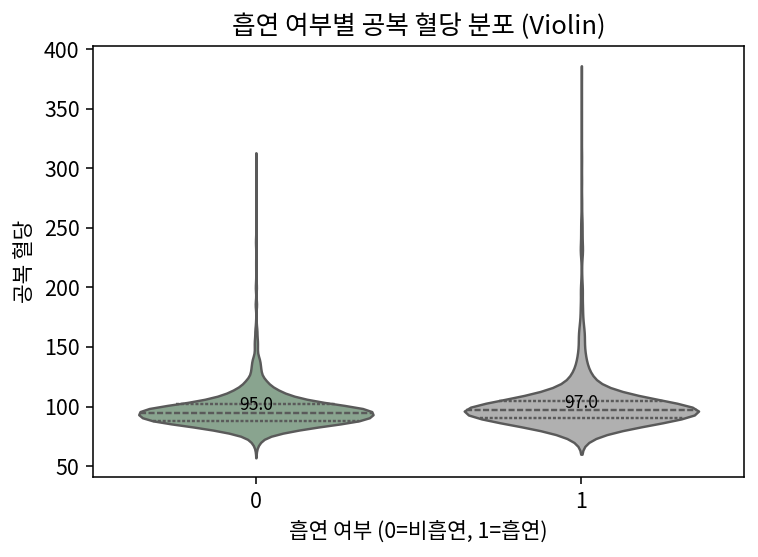

========== 통계 검정 결과 ============
Welch t-test: t = -8.379, p = 7.36e-17
→ 평균 차이가 통계적으로 유의함 (p < 0.05)
----------------------------------------
Mann–Whitney U test: U = 4990501.000, p = 6.24e-18
→ 분포 차이가 통계적으로 유의함 (p < 0.05)
7.356002149163123e-17
6.242135767272856e-18


In [ ]:
#흡연 여부에 따라 공복 혈당, 요 단백, 크레아티닌과 같은 대사 및 신장 기능 관련 지표에 차이가 존재하는지 확인
#흡연과 공복 혈당
df['label_int'] = df['label'].astype(str).str.strip().astype(int)
plt.figure(figsize=(6,4))
ax = sns.violinplot(
                    data=df,
                    x="label_int",
                    y="공복 혈당",
                    order=[0, 1],  # x축 순서 고정 (label이 int든 str이든 상관없이)
                    palette=["#84a98c", "#B0B0B0"],
                    gap=.1,
                    inner="quartile", #-------------IQR(중앙 50%) 범위(가운데 점선 → 중앙값)
                    cut=0                                           #(위 점선 → 상위 25% 경계
                )                                                   #아래 점선 → 하위 25% 경계
ax.set_title('흡연 여부별 공복 혈당 분포 (Violin)')
ax.set_xlabel('흡연 여부 (0=비흡연, 1=흡연)')
#중앙값 쓰기
median0 = df.loc[df['label']==0, '공복 혈당'].median()
median1 = df.loc[df['label']==1, '공복 혈당'].median()

ax.text(0, median0+2, f"{median0:.1f}", ha='center', fontsize=9) #median0+2 중앙값선 위2 위치
ax.text(1, median1+2, f"{median1:.1f}", ha='center', fontsize=9)
plt.show()

#-----------------------======================================통계 검정(T-test / Mann–Whitney)

smoke0 = df.loc[df['label_int']==0, '공복 혈당'].dropna()
smoke1 = df.loc[df['label_int']==1, '공복 혈당'].dropna()   #-----그룹 분리

from scipy.stats import ttest_ind                  #-----T-test
t, p_t = ttest_ind(smoke0, smoke1, equal_var=False) # Welch t-test(평균 차이 확인)

from scipy.stats import mannwhitneyu              #----Mann–Whitney (분포 전체 차이-순위)
u, p_u = mannwhitneyu(smoke0, smoke1, alternative='two-sided')


print("========== 통계 검정 결과 ============")
# Welch t-test 해석
print(f"Welch t-test: t = {t:.3f}, p = {p_t:.2e}")
if p_t < alpha:
    print("→ 평균 차이가 통계적으로 유의함 (p < 0.05)")
else:
    print("→ 평균 차이가 통계적으로 유의하지 않음 (p ≥ 0.05)")

print("-" * 40)

# Mann–Whitney 해석
print(f"Mann–Whitney U test: U = {u:.3f}, p = {p_u:.2e}")
if p_u < alpha:
    print("→ 분포 차이가 통계적으로 유의함 (p < 0.05)")
else:
    print("→ 분포 차이가 통계적으로 유의하지 않음 (p ≥ 0.05)")
print(p_t)
print(p_u)

흡연자 집단에서 일부 고혈당 관측치가 존재하며,
분포의 상위 꼬리 영역이 비흡연자에 비해 다소 길게 나타났다.
그러나 중앙값과 사분위 범위는 두 집단 간 유사하게 겹쳐 있으며,
통계 검정 결과 	두 검정 모두 p ≪ 0.05 통계적으로는 유의하지만, 효과 크기는 매우 작다고..

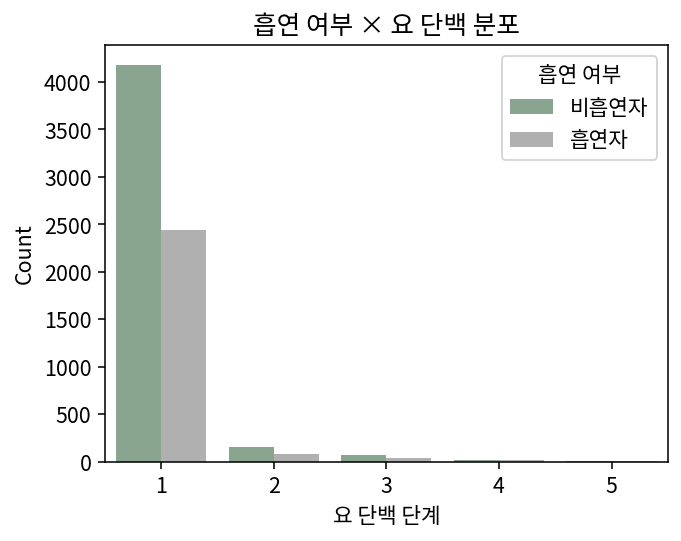

Chi-square = 3.63, p-value = 4.5892e-01

[Chi-square Analysis Result Report]
------------------------------------------------------------
Chi-square statistic : 3.63
P-value              : 0.0001
Degrees of freedom   : 4
------------------------------------------------------------
Conclusion:
→ 흡연 여부에 따른 요 단백 단계 분포는 통계적으로 유의한 관련이 있다 (p < 0.05)
------------------------------------------------------------
Observed Values
요 단백          1    2   3   4  5
label_int                      
0          4180  156  65  20  8
1          2438   75  42  14  2
------------------------------------------------------------
Expected Values
요 단백                 1        2          3          4         5
label_int                                                      
0          4187.303143  146.157  67.700429  21.512286  6.327143
1          2430.696857   84.843  39.299571  12.487714  3.672857


In [ ]:
#요 단백  범주형 ! countplot 분포비교하고 + 카이제곱

plt.figure(figsize=(5,4))
ax = sns.countplot(
    data=df,
    x='요 단백',
    hue='label_int',
    palette={0:"#84a98c", 1:"#B0B0B0"}
)

ax.set_title('흡연 여부 × 요 단백 분포')
ax.set_xlabel('요 단백 단계')
ax.set_ylabel('Count')
ax.legend(title='흡연 여부', labels=['비흡연자', '흡연자'])
plt.tight_layout()
plt.show()
#-----------------------======================================검정
from scipy.stats import chi2_contingency

uacr_table = pd.crosstab(df['label_int'], df['요 단백'])
chi2, p, dof, expected = chi2_contingency(uacr_table)

print(f"Chi-square = {chi2:.2f}, p-value = {p:.4e}")


print('\n[Chi-square Analysis Result Report]')
print('-'*60)
print(f'Chi-square statistic : {chi2:.2f}')
print(f'P-value              : {p_val:.4f}')
print(f'Degrees of freedom   : {dof}')
print('-'*60)
if p_val < 0.05:
    print('Conclusion:')
    print('→ 흡연 여부에 따른 요 단백 단계 분포는 통계적으로 유의한 관련이 있다 (p < 0.05)')
else:
    print('Conclusion:')
    print('→ 흡연 여부에 따른 요 단백 단계 분포는 통계적으로 유의한 관련이 없다 (p ≥ 0.05)')
print('-'*60)
print('Observed Values')
print(uacr_table)
print('-'*60)
print('Expected Values')
print(pd.DataFrame(expected,
                   index=uacr_table.index,
                   columns=uacr_table.columns))
print('='*60)

/tmp/ipython-input-1156352475.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


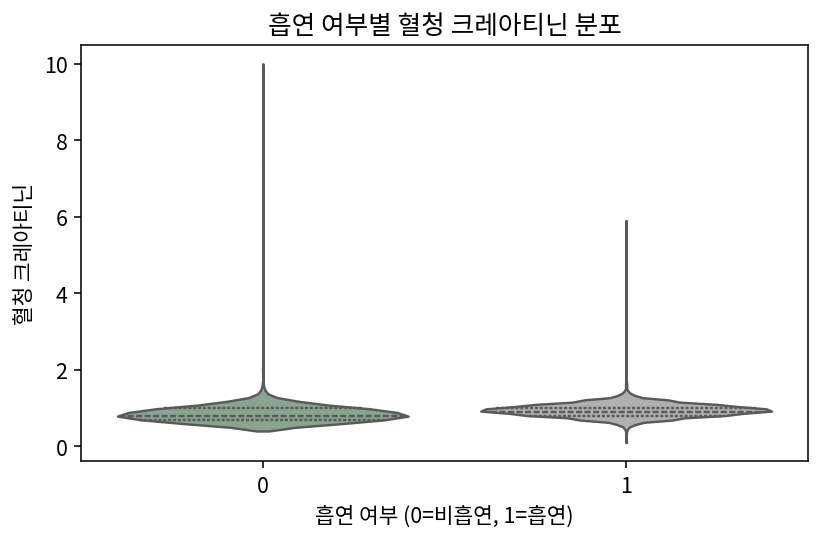

/tmp/ipython-input-1156352475.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


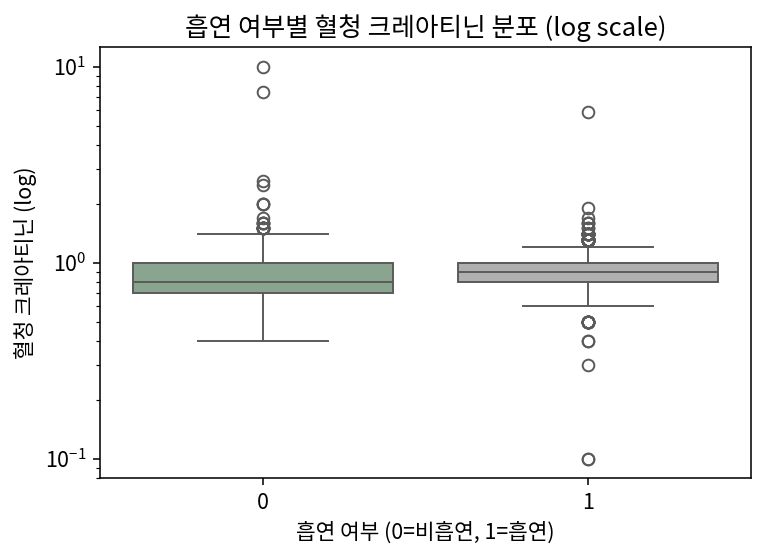

========== 통계 검정 결과 ============
Welch t-test: t = -18.273, p = 8.13e-73
→ 평균 차이가 통계적으로 유의함 (p < 0.05)
----------------------------------------
Mann–Whitney U test: U = 3841665.000, p = 3.35e-117
→ 분포 차이가 통계적으로 유의함 (p < 0.05)


In [ ]:
#크레아티닌 연속형,평균보다 중앙값 중요 → box/Violin plot + 검정
df['label_int'] = df['label'].astype(str).str.strip().astype(int)
plt.figure(figsize=(6,4))
ax = sns.violinplot(
    data=df,
    x='label_int',
    y='혈청 크레아티닌',
    order=[0,1],
    palette=["#84a98c", "#B0B0B0"],
    inner='quartile',
    cut=0
)

ax.set_title('흡연 여부별 혈청 크레아티닌 분포')
ax.set_xlabel('흡연 여부 (0=비흡연, 1=흡연)')
ax.set_ylabel('혈청 크레아티닌')
plt.tight_layout()
plt.show()

#이건 뭐 볼수가 없 너무 납작,,, 밀도를 보기엔 값이 너무 적다

#로그 스케일
plt.figure(figsize=(6,4))
ax = sns.boxplot(
    data=df,
    x='label_int',
    y='혈청 크레아티닌',
    showfliers=True,
    palette=["#84a98c", "#B0B0B0"]
)

ax.set_yscale('log')
ax.set_title('흡연 여부별 혈청 크레아티닌 분포 (log scale)')
ax.set_xlabel('흡연 여부 (0=비흡연, 1=흡연)')
ax.set_ylabel('혈청 크레아티닌 (log)')
plt.show()


#-----------------------======================================검정
cre0 = df.loc[df['label_int']==0, '혈청 크레아티닌'].dropna()
cre1 = df.loc[df['label_int']==1, '혈청 크레아티닌'].dropna()

from scipy.stats import ttest_ind, mannwhitneyu
alpha = 0.05  # 유의수준

# Welch t-test
t, p_t = ttest_ind(cre0, cre1, equal_var=False)

# Mann–Whitney
u, p_u = mannwhitneyu(cre0, cre1, alternative='two-sided')

print("========== 통계 검정 결과 ============")
# Welch t-test 해석
print(f"Welch t-test: t = {t:.3f}, p = {p_t:.2e}")
if p_t < alpha:
    print("→ 평균 차이가 통계적으로 유의함 (p < 0.05)")
else:
    print("→ 평균 차이가 통계적으로 유의하지 않음 (p ≥ 0.05)")

print("-" * 40)

# Mann–Whitney 해석
print(f"Mann–Whitney U test: U = {u:.3f}, p = {p_u:.2e}")
if p_u < alpha:
    print("→ 분포 차이가 통계적으로 유의함 (p < 0.05)")
else:
    print("→ 분포 차이가 통계적으로 유의하지 않음 (p ≥ 0.05)")

흡연자의 중앙값이 약간 위에 있다 일반적인 크레아티닌 수준이 비교적 높다는 의미이고
흡연자 박스가 더 ㅡ얇고 짧은건 이 집단은 대부분 비슷한 범위에 밀집해있음을 의미한다.
비흡연자쪽에서 매우 큰 값이 소수 보이는데 이는 기저질환이나 그 외 다른 요인으로 발생한 극단적 소수 사례일것..
앞서 실시한 검정결과와 동일하게 중앙값과 분포위치차이가 유의함을 알 수 있음

In [ ]:
print(df.columns)

Index(['ID', '나이', '키(cm)', '몸무게(kg)', 'BMI', '시력', '충치', '공복 혈당', '혈압',
       '중성 지방', '혈청 크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈', '요 단백',
       '간 효소율', 'label', '연령대', '체중상태구분', '흡연여부'],
      dtype='object')


추가적으로 각 건강 지표 간의 관계도 이해해봅시다!
예를 들어, BMI, 혈압, 혈당, 콜레스테롤 등의 수치형 변수들은 서로 영향을 주고받을 수 있으며, 이를 통해 건강 상태를 종합적으로 이해하거나, 향후 모델 설계 및 연구 방향을 제안할 수 있습니다.
추가적인 인사이트를 얻어볼까요 ?

### 상관계수를 구하고 HeatMap으로 시각화 후 분석을 해보세요.
- Heatmap: 변수 간의 상관관계(Correlation)를 색상으로 쉽게 확인할 수 있는 시각화 방법입니다.
- 해석 기준:
  - 값이 1에 가까울수록 → 강한 양의 상관관계
  - 값이 -1에 가까울수록 → 강한 음의 상관관계
  - 값이 0에 가까울수록 → 관계가 약함

이를 통해 변수 간 관계를 한눈에 비교하고, 분석에 필요한 주요 변수를 파악할 수 있습니다.

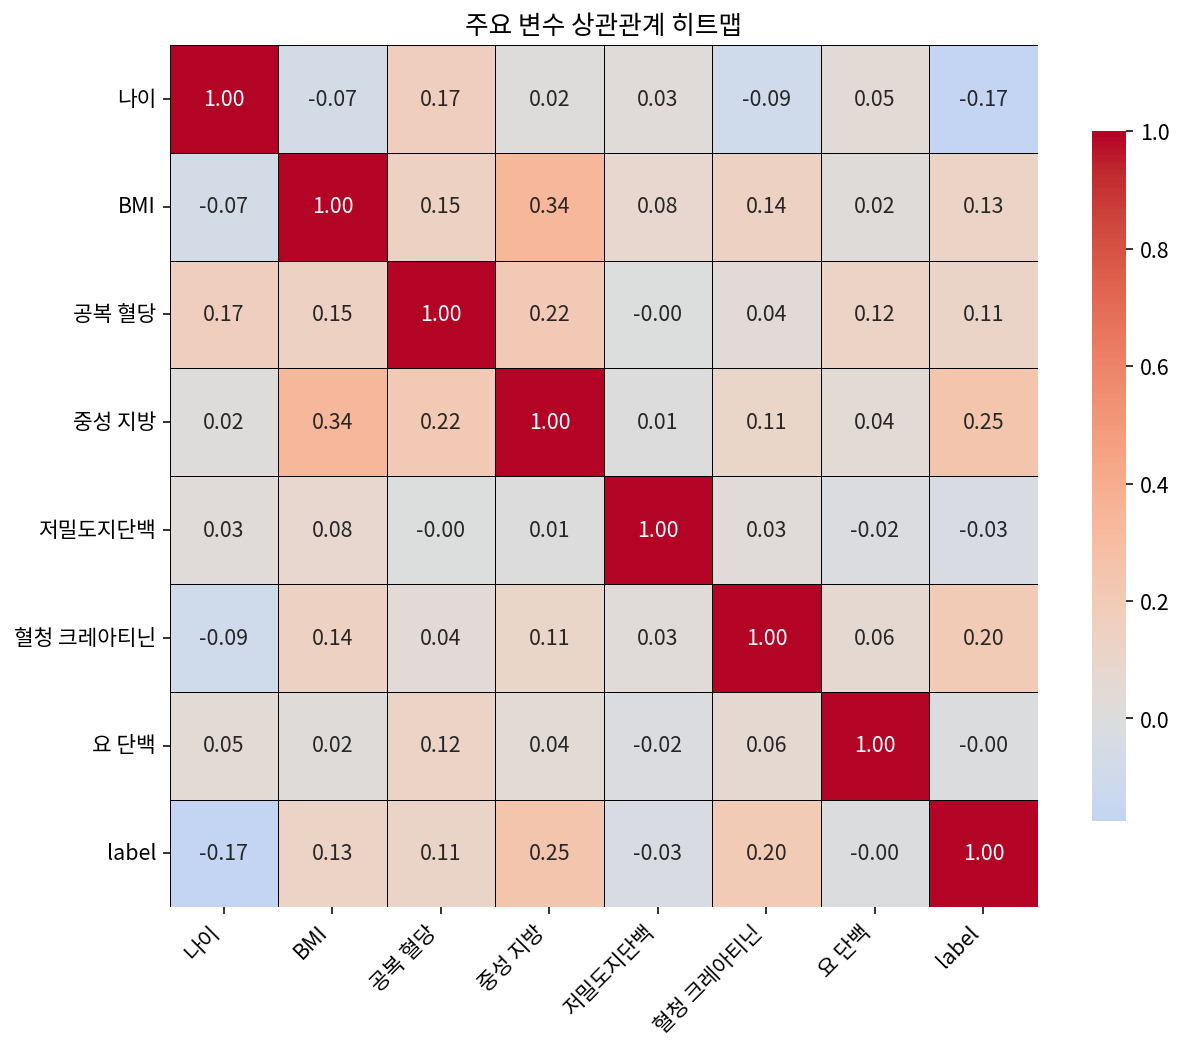

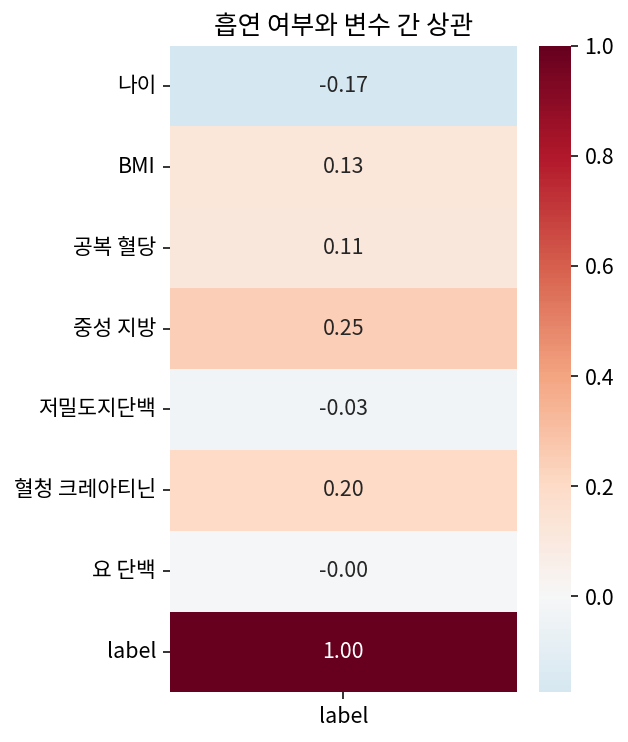

In [ ]:
# sns.heatmap(df.corr(numeric_only=True), #-----수치컬럼간 상관계수
#             annot = True, #-------------상관계수 수치 표시
#             cmap = 'coolwarm')  #-------컬러맵 지정
#             #ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ난리났네

cols = [
        '나이', 'BMI',
    '공복 혈당', '중성 지방',
    '저밀도지단백',
    '혈청 크레아티닌',
    '요 단백',
    'label'
]
corr = df[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(

            corr,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            linecolor="black",
            cbar_kws={"shrink": 0.8}

)

plt.title('주요 변수 상관관계 히트맵')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

#==================흡연여부와 주요변수들간만의 상관관계=============
plt.figure(figsize=(4,6))
sns.heatmap(
    corr[['label']],
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0
)
plt.title("흡연 여부와 변수 간 상관")
plt.show()

## 5. 관계 정리
- 강한 관계의 변수
- 약한 관계의 변수

In [ ]:
### 강한 관계를 보이는 변수에는 어떤 것이 있나요 ?
#BMI-중성지방
#흡연-중성지방
#흡연-혈청 크레아티닌


In [ ]:
### 약한 관계를 보이는 변수에는 어떤 것이 있나요 ?
#저밀도지단백,요단백

## 5. 결론 도출
어떤 요인이 흡연 여부와 관련성이 높은지 인사이트 제시

예시)
- 흡연자는 비흡연자에 비해 평균 혈압과 중성지방 수치가 유의하게 높았습니다.(p<0.05)
- 반면, BMI는 유의한 차이가 없었습니다. (p>0.05)
- 따라서 흡연은 대사 관련 지표(혈압, 중성지방)에 더 큰 영향을 미치는 것으로 해석할 수 있습니다.

##어떤 요인이 흡연 여부와 관련성이 높을까요 ? 그 이유는?
#### 상관관계 분석 결과, BMI와 중성지방 사이에서 가장 뚜렷한 양의 상관관계가 관찰되었으며,
#### 흡연 여부는 중성지방 및 혈청 크레아티닌과 약한 양의 상관을 보였다.
#### 반면 저밀도지단백과 요 단백은 흡연 여부 및 다른 대사지표와의 상관성이 낮았다.

#### 흡연 여부는 LDL 콜레스테롤보다는 중성지방, 공복 혈당, 혈청 크레아티닌과 같은
#### 대사·신장 기능 지표와 더 관련성이 있으며,특히 분석 결과 분포의 중심(중앙값) 수준에서 유의한 차이가 관찰되었다
#### 그러나 흡연과 혈당 사이 BMI값이 개입되어있을 수 있으며 흡연으로인한 크레아티닌수치 상승이라기엔 노화의 징후일수도 있다
### 이처럼 다양한 변수들을 추가로 분석했을때에도 흡연이 영향을 미치는지 추가적으로 분석해볼 필요가 있어보인다.